In [639]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline
from numpy import convolve as conv

def randint(inrange):
    r = np.ceil(np.random.rand(1)*inrange)
    return r

In [640]:
def sine(a, b, amp=1, phase=0,freq=2*np.pi, samp=samp):
    points = np.linspace(a,b,samp)
    sine = amp*np.sin(freq*points-phase)
    return sine

In [641]:
# def delay(array,extreme=1):
#     ones = np.ones(np.ceil(np.random.rand(1)*extreme))
#     arrsh = array.shape
#     onesh = ones.shape
#     zeros = np.zeros(arrsh[0]-onesh[0])
#     conc = np.concatenate((ones,zeros),axis=0)
#     rand = np.random.rand(arrsh[0])
#     Rand = rand*conc
#     delayed np.concatenate((Rand[:onesh[0]],array[1:(arrsh[0]-onesh[0]+1)]), axis=0)
#     print delayed.shape
#     return delayed[:arrsh[0]]

def delay(array,delay=0):
    rand = np.random.rand(delay)
    randsh = rand.shape
    d = np.concatenate((rand, array[randsh[0]:]),axis=0)
    return d

In [642]:
# baseline = 10
# c = 3*10^8
# td = baseline/c # time delay between two antennas

# ds1_a1 = delay(s1_a1)
# ds1_a2 = delay(s1_a2, 1000)
# ds2_a1 = delay(s2_a1,1000)
# ds2_a2 = delay(s2_a2)

In [709]:
samp = 4096
# Noise from sources
n_1 = np.random.randn(samp)*1
n_2 = np.random.randn(samp)*1

# Noise from source 1 seen by antenna 1
n1_a1 = delay(n_1)
# Noise from source 2 seeb by antenna 1
n2_a1 = delay(n_2,10)

# Noise from source 1 seen by antenna 2
n1_a2 = delay(n_1,1000)
# Noise from source 2 seen by antenna 2
n2_a2 = delay(n_2)

In [710]:
r_amp= randint(1)
r_pha = randint(20)
r_freq = randint(np.pi)

r2_amp= randint(1)
r2_pha = randint(40)
r2_freq = randint(5*np.pi)

# Signals of interest
s1_a1 = sine(0, 2*np.pi, r_amp, r_pha,r_freq, samp)
s1_a2 = sine(0, 2*np.pi, r_amp , r_pha-randint(500), r_freq, samp)

s2_a1 = sine(0, 2*np.pi, r2_amp, r2_pha-randint(800),r2_freq, samp)
s2_a2 = sine(0, 2*np.pi, r2_amp , r2_pha, r2_freq, samp)

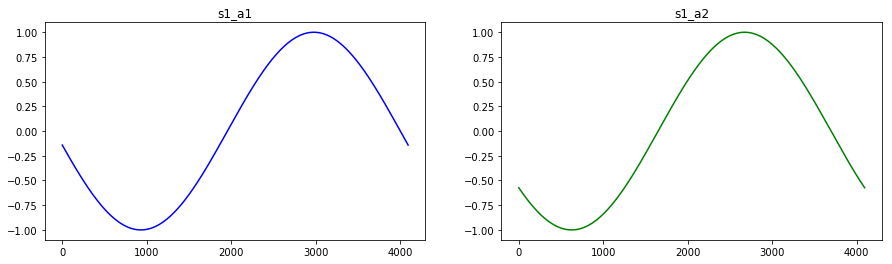

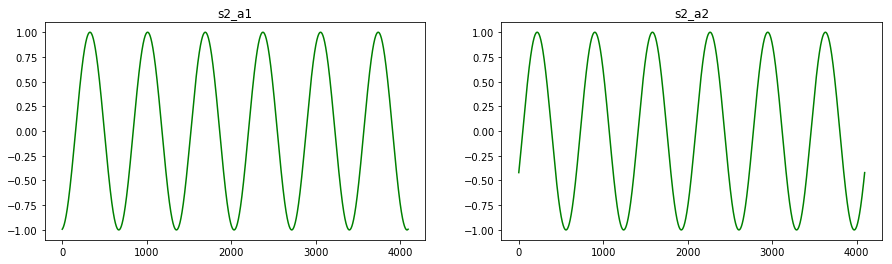

In [711]:
# s1_a2 = delay(s_1,2000)
# s2_a2 = delay(s_2,0)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
ax1.plot(s1_a1, c='b'); ax1.set_title('s1_a1')
ax2.plot(s1_a2, c='g'); ax2.set_title('s1_a2')

fig, (ax3,ax4) = plt.subplots(1,2,figsize=(15,4))
ax3.plot(s2_a1, c='g'); ax3.set_title('s2_a1')
ax4.plot(s2_a2, c='g'); ax4.set_title('s2_a2')

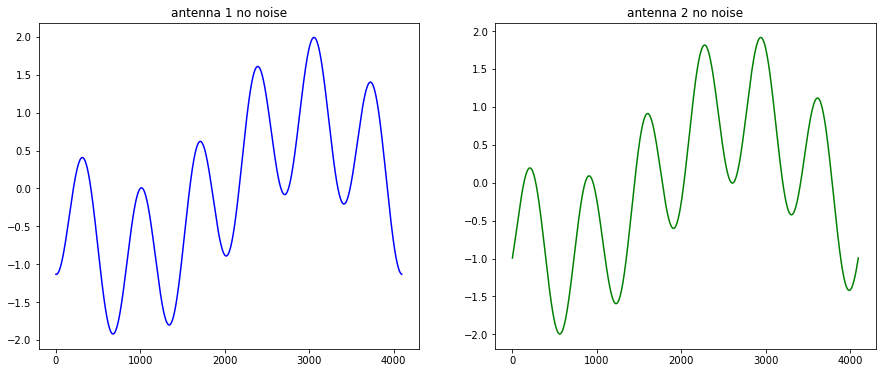

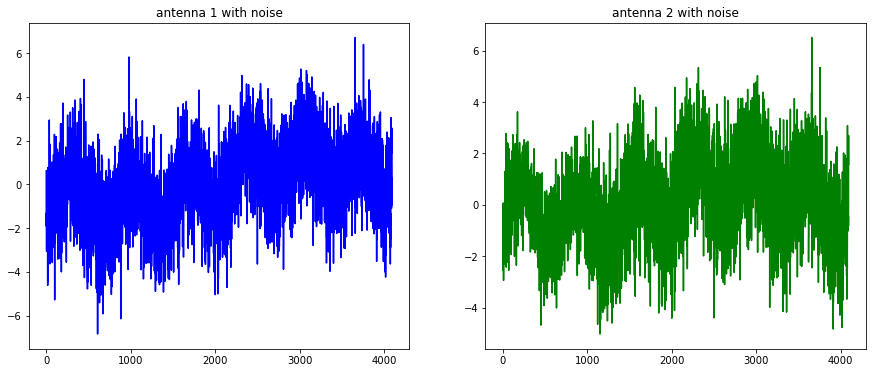

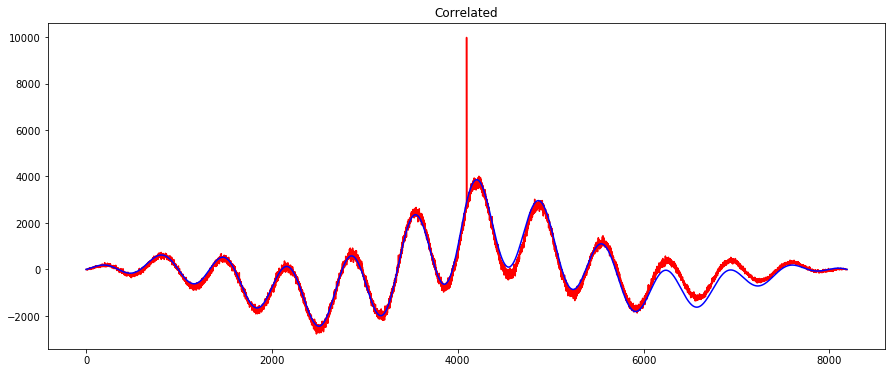

In [712]:
v1 = n1_a1 + n2_a1 + s1_a1 + s2_a1
v2 = n1_a2 + n2_a2 + s1_a2 + s2_a2

v_1 = s1_a1 + s2_a1
v_2 = s1_a2 + s2_a2
v1convv2=conv(v1,v2[::-1],'full')
v_1convv_2=conv(v_1,v_2[::-1], 'full')

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.plot(v_1, c='b'); ax1.set_title('antenna 1 no noise')
ax2.plot(v_2, c='g'); ax2.set_title('antenna 2 no noise')

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.plot(v1, c='b'); ax1.set_title('antenna 1 with noise')
ax2.plot(v2, c='g'); ax2.set_title('antenna 2 with noise')

fig, (ax_1) = plt.subplots(1,figsize=(15,6))
ax_1.plot(v1convv2, c='r')
ax_1.plot(v_1convv_2, c='b'); ax_1.set_title('Correlated')
# ax_2.plot(np.fft.fftshift(np.fft.fft(np.fft.fftshift(v_1convv_2)))); #ax_2.set_xlim(4060,4120)

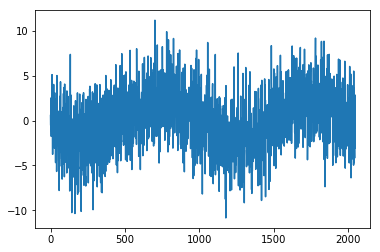

In [708]:

plt.plot(fix)
